**Исследование данных продаж видеоигр.**

**Описание проекта**: Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить основные параметры, влияющие на успешность и популярность той или иной игры и, как следствие, ее продажи.

**Цель исследования**: Выявить основные факторы, влияющие на продажи видеоигр, при планировании рекламных кампаний на 2017 год и определить наиболее популярные игровые платформы. Составить примерный портрет покупателя на трех интересующих нас рынках (NA, EU, JP).

**Ход исследования**:
- Подготовка и предобработка данных: загрузка и изучение информации, обработка пропущенных значений, корректировка типов данных, дубликатов и других аномалий.
- Исследовательский анализ данных: изучение основных данных и параметров, выявление потенциально прибыльных платформ и факторов влияющих на продажи.
- Составление портретов пользователей по регионам: анализ наиболее популярных платформ и жанров на рынках NA, EU и JP.
- Статистический анализ: формулирование гипотез по интересующим нас продуктам и тестирование гипотез.

В конце проекта будет сформулирован общий вывод на основе полученных результатов.

## Загрузка и предобработка данных.

In [1]:
#Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv',)
pd.set_option('display.max_columns', None)

In [3]:
# Приведем названия столбцов к нижнему регистру
data.columns = map(str.lower, data.columns)
# Выведем первые 5 строк датафрейма
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Выведем общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Уберем пропущенные значения из столбцов name, year_of_release, genre
data.dropna(subset=['name'], inplace=True)
data.dropna(subset=['year_of_release'], inplace=True)
data.dropna(subset=['genre'], inplace=True)
data.reset_index(drop=True)
# Преобразуем данные в столбце year_of_release к типу int
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [6]:
# Посмотрим на уникальные значения столбца user_score
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [7]:
# Изучим количество пропусков в столбце critic_score относительно всех строк датафрейма
display(data['critic_score'].isna().sum())
data['critic_score'].isna().sum() / 16444

8461

0.5145341765993675

В столбце critic_score 8461 пропуск, что составляет примерно 51% от всех строк нашего датафрейма. Замена переменной средним или медианой не представляется возможным, т.к. сильно исказит результаты нашего исследования. Вместо пропусков установим маркер -1 (т.к. оценка критиков принимает значения от 0 до 100). 

In [8]:
# Установим маркер -1
data['critic_score'] = data['critic_score'].fillna(-1)
data['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [9]:
# Посмотрим на уникальные значения столбца user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
# Посчитаем значения tbd
display(data[data['user_score'] == 'tbd']['user_score'].count())

2376

В столбце user_score у нас также имеется большое количество пропусков, действуем аналогично. Также в столбце имеется 2376 значений tbd (еще не выставленные оценки, которые, однако, встречаются и за игры 2011 года и ранее, что может говорить нам об ошибке в данных), на них установим такой же маркер как и на пропуски.

In [11]:
# Заполним пропуски nan и tbd
data['user_score'] = data['user_score'].fillna(-1)
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1
# Преобразуем данные в столбце user_score к типу float
data['user_score'] = data['user_score'].astype('float64')
# Проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [12]:
# Посмотрим на уникальные значения столбца rating
display(data['rating'].unique())
# # Посчитаем значения nan
display(data['rating'].isna().sum())

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

6676

6676 игр в нашем датасете не имеются возрастного рейтинга, проставим 'no info' в этих пропусках.

In [13]:
data['rating'] = data['rating'].fillna('no info')
# Проверяем 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [14]:
# Добавим столбец с общими продажами:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [15]:
# Проверим наличие явных дубликатов
data.duplicated().sum()

0

Явные дубликаты отсутствуют.

In [16]:
# Проверка на неявные дубликаты по столбцам 'name', 'platform', 'year_of_release'
data[data.duplicated(['name', 'platform', 'year_of_release'])].count()

name               1
platform           1
year_of_release    1
genre              1
na_sales           1
eu_sales           1
jp_sales           1
other_sales        1
critic_score       1
user_score         1
rating             1
total_sales        1
dtype: int64

In [17]:
# Удалим дубликат
data = data.drop_duplicates(['name', 'platform', 'year_of_release'])
#Проверяем
data[data.duplicated(['name', 'platform', 'year_of_release'])].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [18]:
# Проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [19]:
# Проверяем
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no info,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no info,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,no info,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,no info,28.31


**Предобработка данных завершена**:
- в данных нет пропусков, 
- в столбце year_of_release заменен тип данных на int (т.к. год выпуска игры это целое число), 
- строки с пропущенными значениями name, year_of_release и genre удалены, т.к. эти значения критичный для последующего анализа
- в столбцах critic_score и user_score пропуски заменены на маркер -1, в user_score тип данных изменен на float
- в столбце rating мы заменили пропуски на 'no info'
- дабавлен столбец с общими продажами

## Исследовательский анализ данных.

### Объем продаж в год. Жизненный цикл платформ. Выявление актуального периода для дальнейшего анализа.

Посмотрим, сколько игр выпускалось в разные годы. На основании этих данных возьмем актуальный период для дальнейшего анализа.

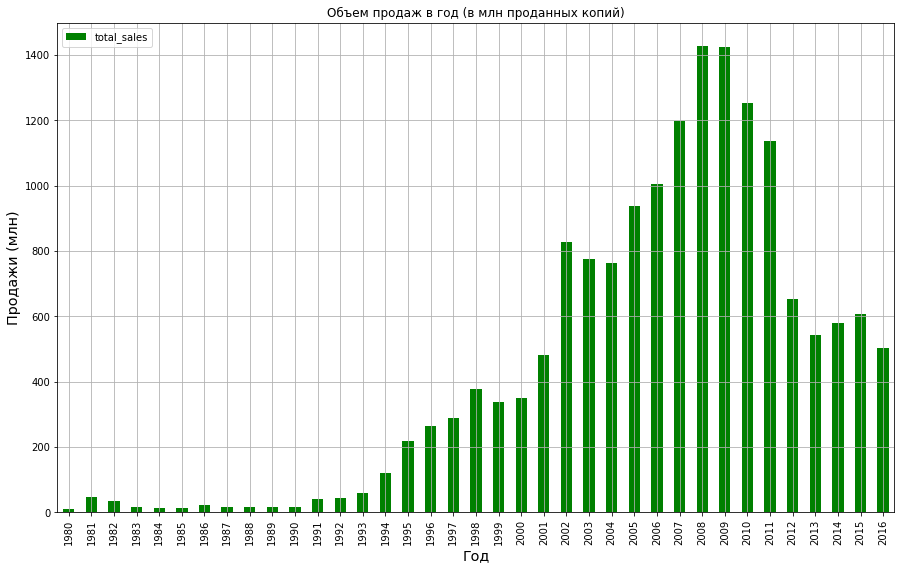

In [20]:
(
data.pivot_table(index= 'year_of_release', values = 'total_sales', aggfunc = 'count')
    .sort_values(by='year_of_release', ascending = True)
    .plot(kind='bar', grid=True,  figsize=(15, 9), title='Объем продаж в год (в млн проданных копий)', 
      color = "Green", style='o')
);
plt.ylabel('Продажи (млн)', size='x-large')
plt.xlabel('Год', size='x-large')
plt.legend(loc='upper left')
plt.show()

Пик продаж приходится на 2008-2009 год, затем объем продаж в млн копий снижается. Это может быть связано как объективными экономическими факторами, так и с окончанием жизненного цикла консолей позапрошлого поколения(их в нашем датафрейме большинство). Необходимо детальнее исследовать данный вопрос, т.к. пока оценить актуальный период для исследования нельзя.

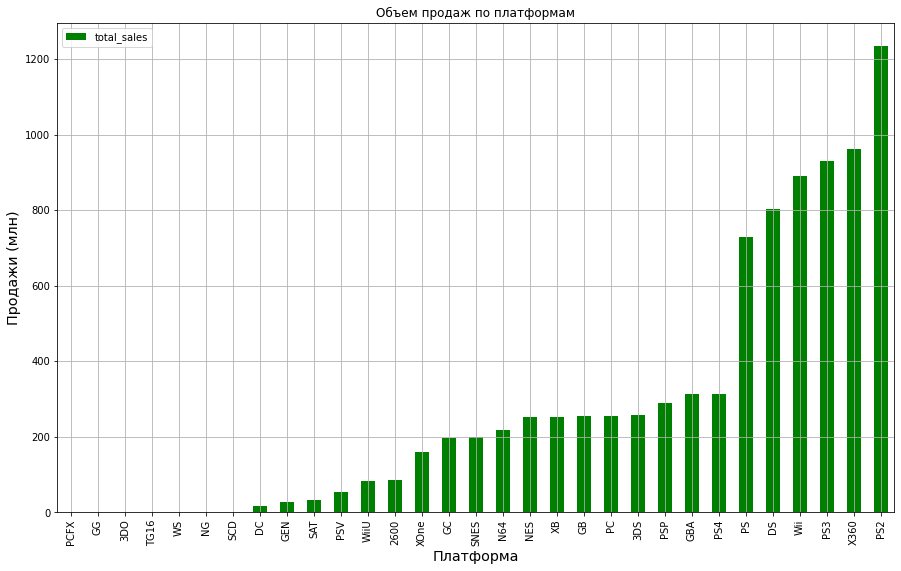

In [21]:
# Посмотрим на данные продаж по платформам
(
data.pivot_table(index='platform',  values = 'total_sales', aggfunc = 'sum')
    .sort_values(by='total_sales', ascending = True)
    .plot(kind='bar', grid=True,  figsize=(15, 9), title='Объем продаж по платформам', 
    color = "Green", style='o')
)
plt.ylabel('Продажи (млн)', size='x-large')
plt.xlabel('Платформа', size='x-large')
plt.legend(loc='upper left')
plt.show()

In [22]:
(
data.pivot_table(index='platform',  values = 'total_sales', aggfunc = 'sum')
    .sort_values(by='total_sales', ascending = False)
    .head(15)
)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Большая часть продаж приходится на старые платформы, которые уже неактуальны для нашего анализа, т.к. их жизненный цикл окончился. Для дальнейшей работы нам нужно выбрать только актуальные платформы, на которые мы и будем ориентироваться в нашем анализе.

In [23]:
# Рассмотрим жизненный цикл исторически наиболее популярных платформ позапрошлого поколения консолей
data_360 = data.query("platform == ['X360']")
data_360 = data_360.pivot_table(index=['platform','year_of_release'],  values = 'total_sales', aggfunc = 'sum')
data_ps3 = data.query("platform == ['PS3']")
data_ps3 = data_ps3.pivot_table(index=['platform','year_of_release'],  values = 'total_sales', aggfunc = 'sum')
data_wii = data.query("platform == ['Wii']")
data_wii = data_wii.pivot_table(index=['platform','year_of_release'],  values = 'total_sales', aggfunc = 'sum')
display(data_360)
display(data_ps3)
display(data_wii)

total_sales
platform year_of_release             
X360     2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84
         2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

total_sales
platform year_of_release             
PS3      2006                   20.96
         2007                   73.19
         2008                  118.52
         2009                  130.93
         2010                  142.17
         2011                  156.78
         2012                  107.35
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60

total_sales
platform year_of_release             
Wii      2006                  137.15
         2007                  152.77
         2008                  171.32
         2009                  206.97
         2010                  127.95
         2011                   59.65
         2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18

Из таблиц видно, что продажи игр на новой платформе растут 4-6 лет, далее платформа уже становится неактуальной и показатели продаж резко падают. Соответственно, будем исходить из этих показателей при определении периода актуальности той или иной платформы.

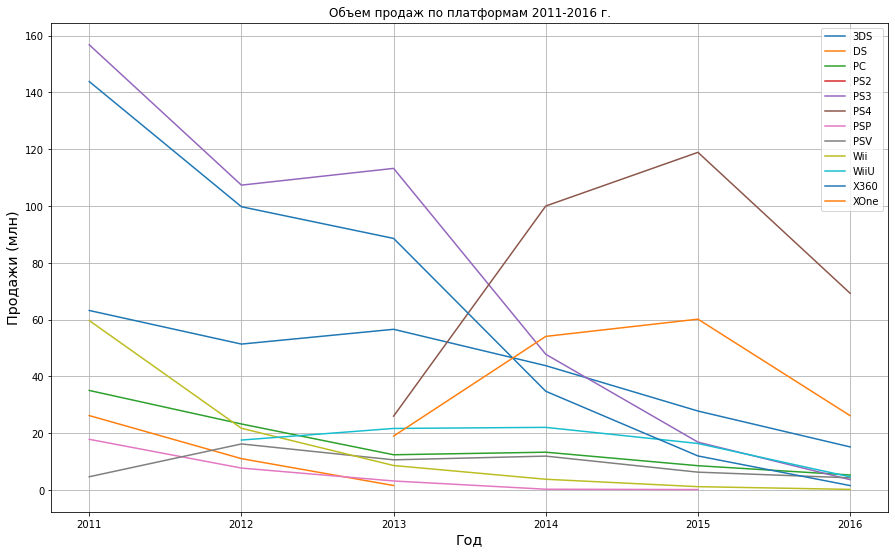

In [24]:
#Посмотрим данные о продажах за последние 5 лет
data = data.query("2011 <= year_of_release <= 2016")
(
data.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
    .plot(grid=True, figsize=(15, 9), title='Объем продаж по платформам 2011-2016 г.')
)
plt.ylabel('Продажи (млн)', size='x-large')
plt.xlabel('Год', size='x-large')
plt.legend(loc='upper right')
plt.show()

In [25]:
data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011,63.20,26.18,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012,51.36,11.01,23.22,NaN,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Из графика и сводной таблицы следует, что: 
- появились две новые платформы PS4 и Xbox One (есть данные с 2013). Их жизненный цикл начался в 2013 году, они будут актуальны еще как минимум 2-3 года. 
- Продажи игр для PS3 и Xbox360 резко снизись после выхода нового поколения консолей, по состоянию на 2016 год можно утверждать, что платформы неактуальны.
- PS Vita, Nintendo WiiU, Nintendo 3DS показывают снижение продаж, их показатели очень скромные на момент 2016 года, что также связано с концом жизненного цикла.
- PS2 уже неактуальна на момент 2011 года.
- Продажи игр на PC в этом датафрейме снижаются, но нужно понимать, что ПК - это единственная неустаревающая платформа, она может быть нам интересна.

**Вывод**: актуальный период будет рассматриваться для 2013-2016 годов, актуальные и потенциально прибыльные платформы - PS4, Xbox One, PC.

### Анализ потенциально прибыльных платформ.

В предыдущем параграфе мы установили актуальный период и нашли платформы, которые могут быть потенциально прибыльны. Построим графики продаж для PC, Xbox One и PS4, а затем диаграмму размаха по этим платформам за период 2013-2016 годов, а также рассмотрим описательную статистику.

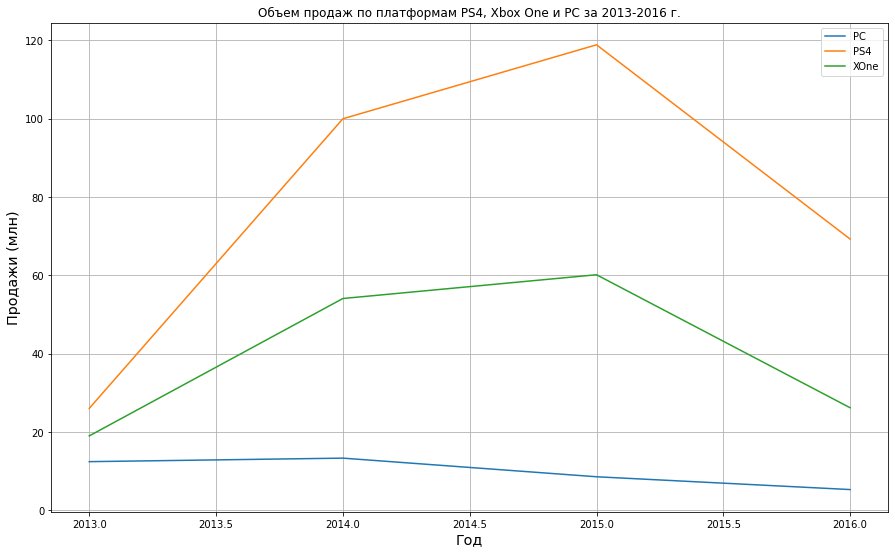

In [26]:
# Создадим отдельную переменную, убрав ненужные платформы и сократив период до 2013-2016
data_sep = data.query("platform == ['PS4', 'XOne', 'PC'] & 2013 <= year_of_release <= 2016")
# Построим графики за 2013-2016 для PS4, Xbox One и PC
(
data_sep.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
    .plot(grid=True, figsize=(15, 9), title='Объем продаж по платформам PS4, Xbox One и PC за 2013-2016 г.')
)
plt.ylabel('Продажи (млн)', size='x-large')
plt.xlabel('Год', size='x-large')
plt.legend(loc='upper right')
plt.show()

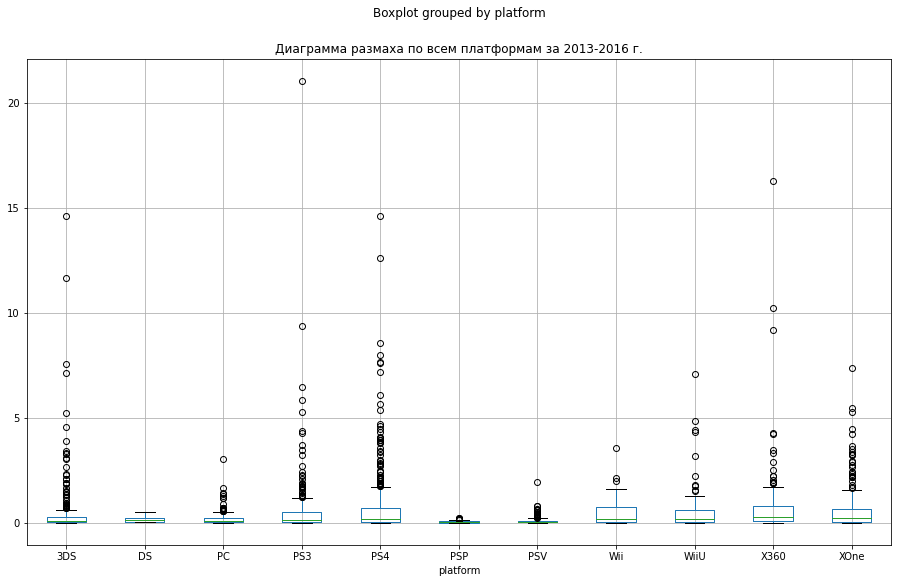

In [27]:
data_sep_2 = data.query('2013 <= year_of_release <= 2016')
# Построим диаграмму размаха для всех платформ за актуальный период
data_sep_2.boxplot(column='total_sales', by='platform', figsize=(15, 9))
plt.title('Диаграмма размаха по всем платформам за 2013-2016 г.')
plt.show()

In [28]:
# Выведем описательную статистику
data_sep_2.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


**Вывод**: из диаграммы размаха видно, что у нас большое количество выбросов. Для игровой индустрии это нормально, т.к. на большое количество посредственных игр приходится один хит, который продается многомиллионными тиражами. Оставим эти данные для дальнейшего анализа. Наиболее перспективная платформа - PS4.

#### Влияние отзывов пользователей и критиков на показатели продаж.

Построим диаграмму рассеяния и вычислим корреляцию между оценками критиков и продажами для наших наиболее актуальных платформ - PS4, Xbox One, PC.

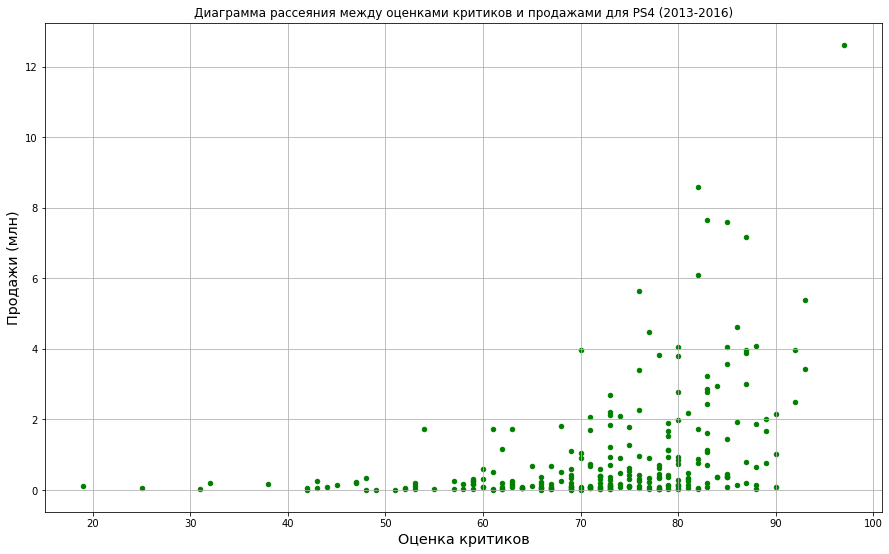

In [29]:
# Построим диаграмму рассеяния для PS4
data_ps4_critic = data_sep.query("platform == ['PS4'] & critic_score > -1")
data_ps4_critic.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(15, 9), color = 'Green')
plt.ylabel('Продажи (млн)', size='x-large')
plt.xlabel('Оценка критиков', size='x-large')
plt.title('Диаграмма рассеяния между оценками критиков и продажами для PS4 (2013-2016)')
plt.show()

In [30]:
#Посчитаем корреляцию между оценками критиков и продажами для PS4
data_ps4_critic['critic_score'].corr(data_ps4_critic['total_sales'])

0.40656790206178095

Коэффициент корреляции ~0,41 говорит нам о наличии прямой, но слабой зависимости между оценками критиков и продажами. Посмотрим как влияют оценки пользователей на продажи.

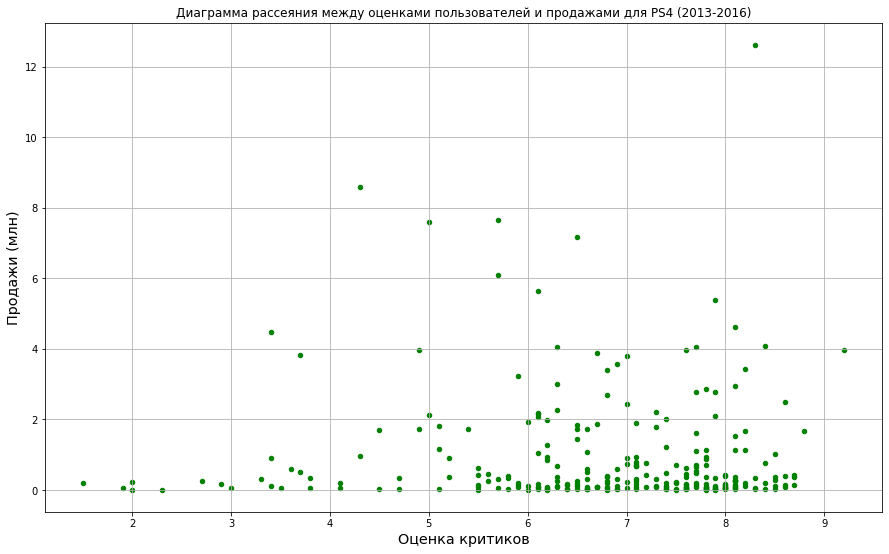

In [31]:
data_ps4_user = data_sep.query("platform == ['PS4'] & user_score > -1")
data_ps4_user.plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(15, 9), color = 'Green')
plt.ylabel('Продажи (млн)', size='x-large')
plt.xlabel('Оценка критиков', size='x-large')
plt.title('Диаграмма рассеяния между оценками пользователей и продажами для PS4 (2013-2016)')
plt.show()

In [32]:
#Посчитаем корреляцию между оценками пользователей и продажами для PS4
data_ps4_user['user_score'].corr(data_ps4_user['total_sales'])

-0.031957110204556376

Коэффициент корреляции принимает отрицательное значение, близкое к нулю, мы можем утверждать, что оценки пользователей почти не влияют на показатели продаж.

Посмотрим аналогичные данные для Xbox One и PC, сравним с нашими данными по PS4 и сделаем общий вывод.

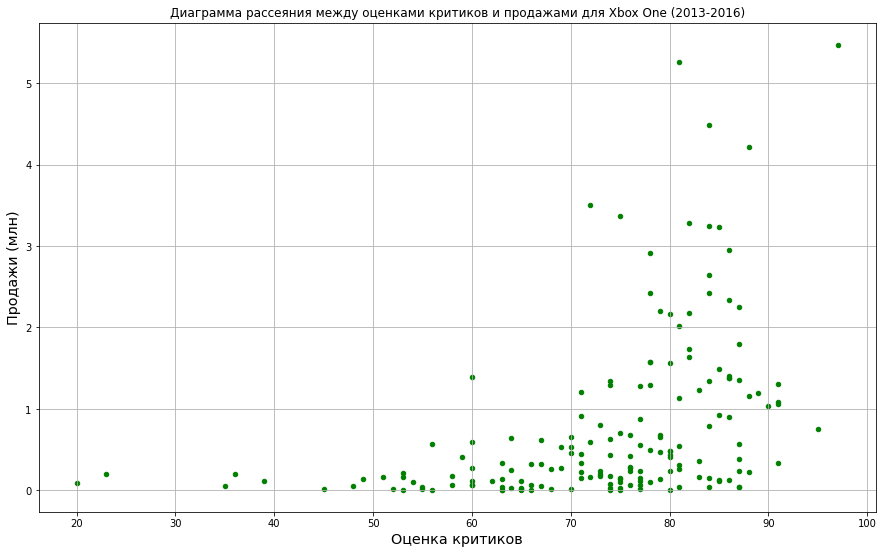

In [33]:
# Построим диаграмму рассеяния для Xbox One
data_xone_critic = data_sep.query("platform == ['XOne'] & critic_score > -1")
data_xone_critic.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(15, 9), color = 'Green')
plt.ylabel('Продажи (млн)', size='x-large')
plt.xlabel('Оценка критиков', size='x-large')
plt.title('Диаграмма рассеяния между оценками критиков и продажами для Xbox One (2013-2016)')
plt.show()

In [34]:
#Посчитаем корреляцию между оценками критиков и продажами для Xbox One
data_xone_critic['critic_score'].corr(data_xone_critic['total_sales'])

0.4169983280084017

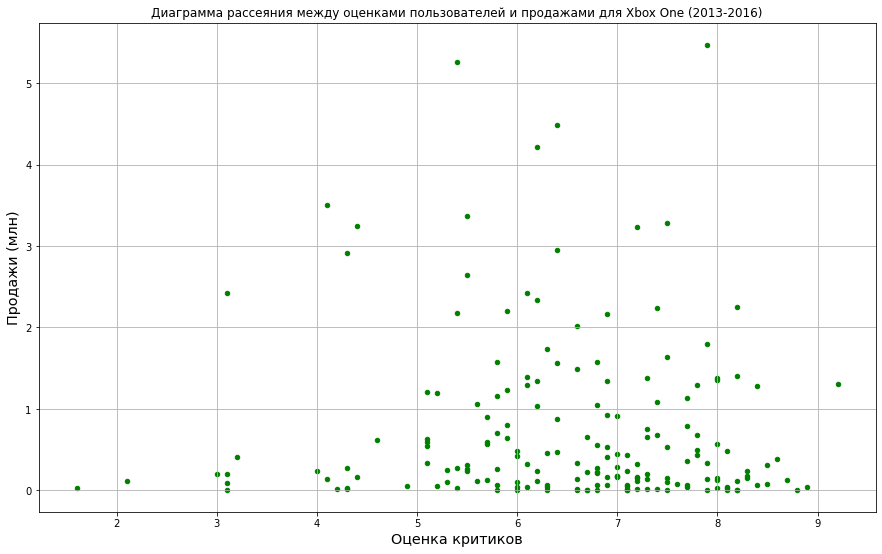

In [35]:
data_xone_user = data_sep.query("platform == ['XOne'] & user_score > -1")
data_xone_user.plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(15, 9), color = 'Green')
plt.ylabel('Продажи (млн)', size='x-large')
plt.xlabel('Оценка критиков', size='x-large')
plt.title('Диаграмма рассеяния между оценками пользователей и продажами для Xbox One (2013-2016)')
plt.show()

In [36]:
#Посчитаем корреляцию между оценками пользователей и продажами для Xbox One
data_xone_user['user_score'].corr(data_xone_user['total_sales'])

-0.06892505328279414

Мы получили примерно аналогичную картину как и на PS4: между оценками криктиков и продажами есть слабая прямая зависимость, оценки пользователей почти не влияют на продажи.

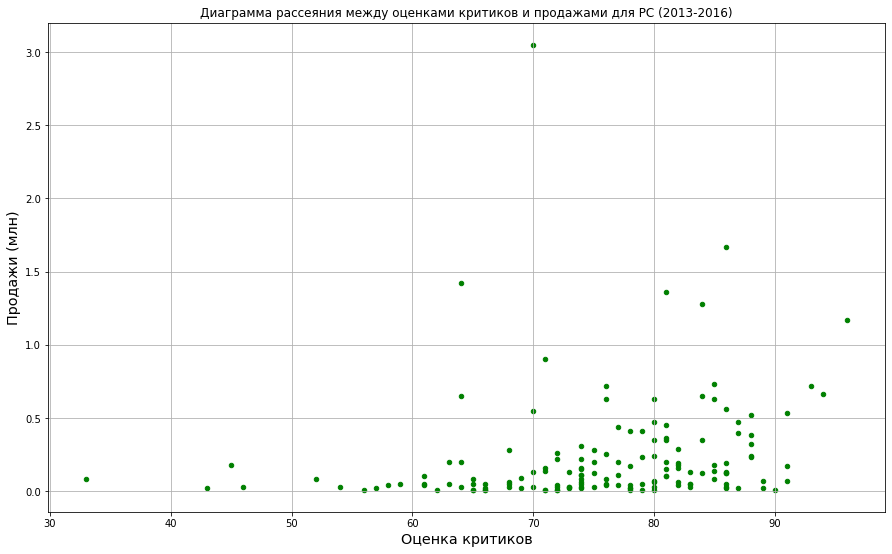

In [37]:
# Построим диаграмму рассеяния для PC
data_pc_critic = data_sep.query("platform == ['PC'] & critic_score > -1")
data_pc_critic.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(15, 9), color = 'Green')
plt.ylabel('Продажи (млн)', size='x-large')
plt.xlabel('Оценка критиков', size='x-large')
plt.title('Диаграмма рассеяния между оценками критиков и продажами для PC (2013-2016)')
plt.show()

In [38]:
#Посчитаем корреляцию между оценками критиков и продажами для PC
data_pc_critic['critic_score'].corr(data_pc_critic['total_sales'])

0.19603028294369382

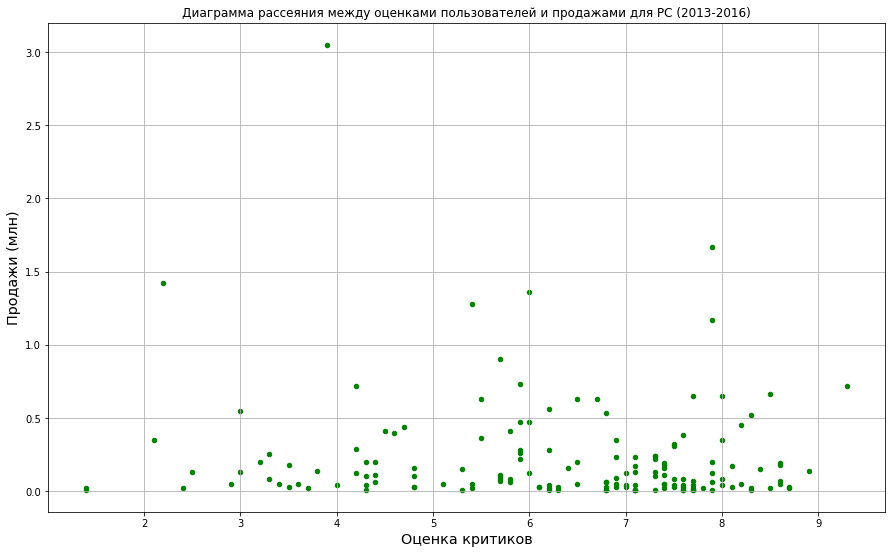

In [39]:
data_pc_user = data_sep.query("platform == ['PC'] & user_score > -1")
data_pc_user.plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(15, 9), color = 'Green')
plt.ylabel('Продажи (млн)', size='x-large')
plt.xlabel('Оценка критиков', size='x-large')
plt.title('Диаграмма рассеяния между оценками пользователей и продажами для PC (2013-2016)')
plt.show()

In [40]:
#Посчитаем корреляцию между оценками пользователей и продажами для PC
data_pc_user['user_score'].corr(data_pc_user['total_sales'])

-0.0938418695247674

У игр на ПК зависимость между оценкой критиков и продажами более слабая, чем на консолях. Оценки пользователей также почти не влиют на продажи.

Вывод: 
- Между оценками критиков и продажами игр существует слабая прямая зависимость. Это логично, т.к. бюджеты для журналистов игровых изданий обычно включают в рекламные кампании при запуске игры.
- Оценки пользователей почти не влияют на продажу игр, зависимость носит обратный характер и корреляция почти отсутствует. Это также логично, т.к. пользователи обычно оставляют отзывы уже после покупки игры и ее релиза, из-за этого зависимость почти отсутствует.

#### Распределение игр по жанрам.

Рассмотрим общее распределение игр по жанрам.

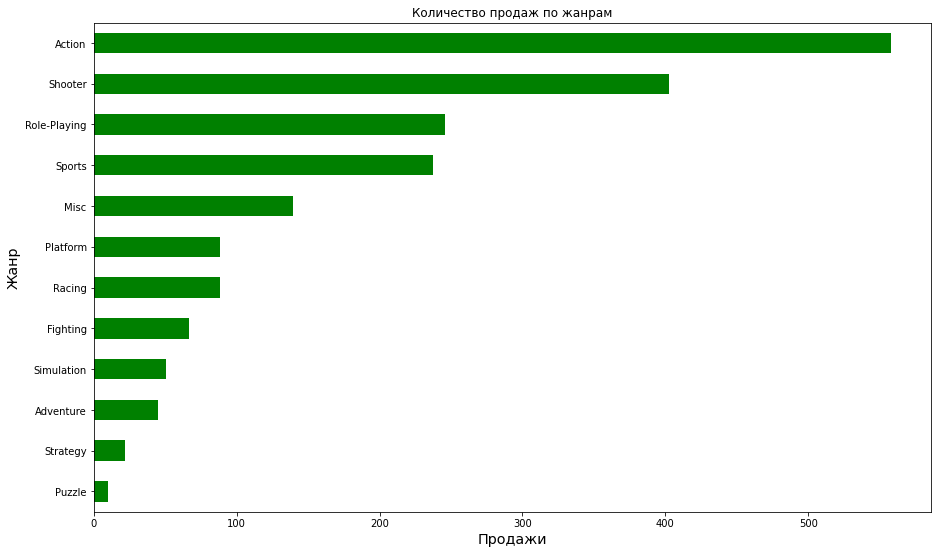

In [41]:
# Построим столбчатую диаграмму по всему датафрейму.
(data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
     .sort_values('total_sales')
     .plot(kind='barh', y='total_sales', figsize=(15, 9), legend=False, color = 'Green')
)
plt.ylabel('Жанр', size='x-large')
plt.xlabel('Продажи', size='x-large')
plt.title('Количество продаж по жанрам')
plt.show()

Экшн игры, шутеры, РПГ и спортивные симуляторы наиболее популярны. Однако стоит посмотреть данные для нашего актуального периода (2013-2016), с годами тенденции в игровой индустрии вполне могли измениться.

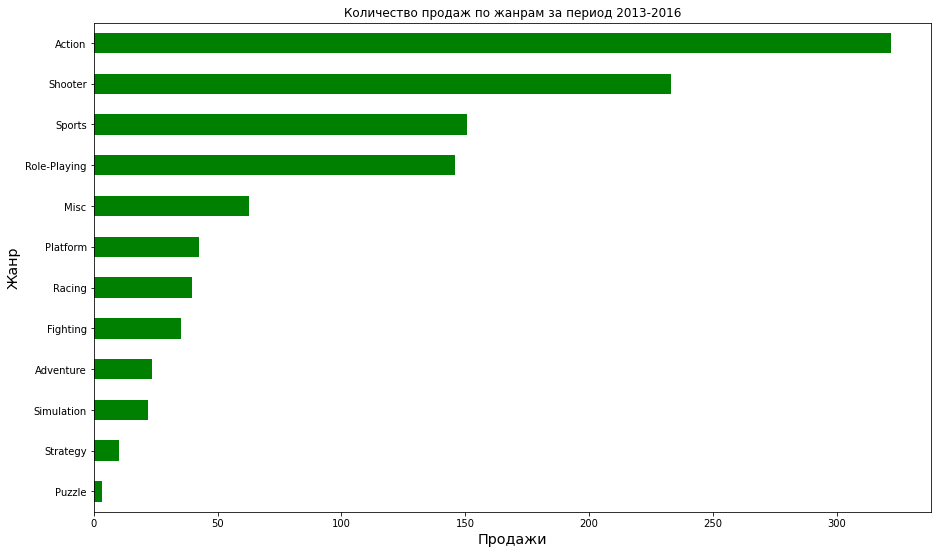

In [42]:
data_act = data.query('2013 <= year_of_release <= 2016')
(data_act.pivot_table(index='genre', values='total_sales', aggfunc='sum')
     .sort_values('total_sales')
     .plot(kind='barh', y='total_sales', figsize=(15, 9), legend=False, color = 'Green')
)
plt.ylabel('Жанр', size='x-large')
plt.xlabel('Продажи', size='x-large')
plt.title('Количество продаж по жанрам за период 2013-2016')
plt.show()

Можно утверждать, что тенденции не поменялись: Экшн, шутер, РПГ и спортивные симуляторы остаются самым популярными жанрами.

Построим диаграмму размаха для нашей переменной data_act, чтобы оценить детальнее оценить продажи того или иного жанра.

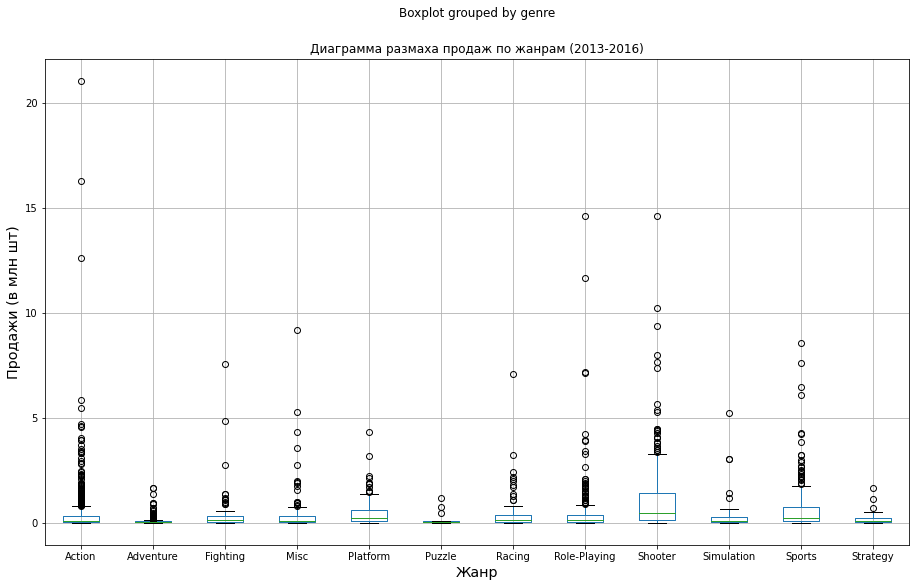

In [43]:
data_act.boxplot(column='total_sales', by='genre', figsize=(15, 9))
plt.title('Диаграмма размаха продаж по жанрам (2013-2016)')
plt.ylabel('Продажи (в млн шт)', size='x-large')
plt.xlabel('Жанр', size='x-large')
plt.show()

In [44]:
# Выведем описательную статистику
data_act.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
Adventure,245.0,0.096490,0.216445,0.01,0.02,0.030,0.0700,1.66
Fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
Misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18
Platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
Puzzle,17.0,0.186471,0.325172,0.01,0.02,0.060,0.1100,1.19
Racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
Role-Playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
Shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63


Из диаграммы размаха и описательной статистики мы можем сделать вывод:
- Шутер является наиболее продаваемым жанром. Это заметно и самому большому значению первого квантиля 0.14, второго - 	0.45, так и по самому большому значению третьего квантиля и - 1.43. 
- Экшн игры являются самым представленным жанром в датафрейме, но их показатели не сильно отличаются от конкурентов. Если, например, сравнить Экшн и РПГ, то мы выясним, что значения квантилей 25%, 50%, 75% лучше именно у РПГ. У жанра Экшн наибольшее количество выбросов (игр-хитов), но описательная статистика свидетельствует и о большом количестве игр, которые продались небольшим тиражом.
- РПГ и спортивные симуляторы по количеству уступают жанру Экшн, но значения их квантилей 25%, 50%, 75% сопоставимы с ними, что говорит о популярности этих двух жанров.
- Остальные жанры уступают четырем вышеперечисленным по всем показателям.

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Верно. Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассматривать средние или медианные продажи.
</div>

### Портреты пользователей по регионам.

#### Самые популярные платформы (топ-5) по регионам NA, EU и JP.

In [45]:
# Сгруппируем данные топ-5 платформ по регионам NA, EU и JP
data_na = data_act.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
data_eu = data_act.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
data_jp = data_act.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
display(data_na)
display(data_eu)
display(data_jp)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


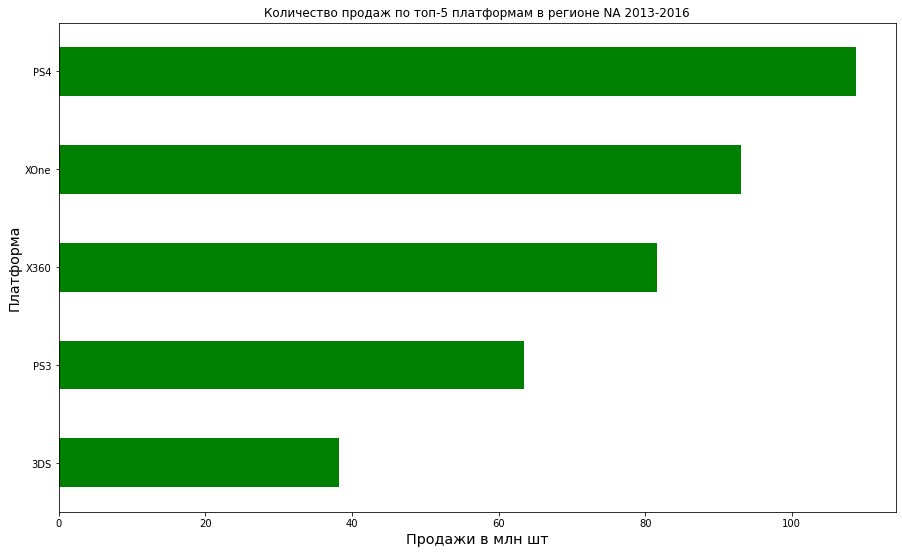

In [46]:
# Построим графики по топ-5 платформам по регионам NA, EU и JP
data_na.plot(kind='barh', y='na_sales', figsize=(15, 9), legend=False, color = 'Green')
plt.gca().invert_yaxis()
plt.ylabel('Платформа', size='x-large')
plt.xlabel('Продажи в млн шт', size='x-large')
plt.title('Количество продаж по топ-5 платформам в регионе NA 2013-2016')
plt.show()

В регионе NA наибольшие продажи были у игр на PS4 (1-ое место) и хорошие результаты показали продажи игр на Xbox One (2-ое место). Игры на платформы предыщего поколения занимают третье и четвертое место соответственно. Игры на портативную Nintendo 3DS занимают последнюю позицию в списке топ-5. Вывод: в регионе NA наиболее популярны стационарные консоли (PS4 и Xbox One), PS4 - лидер рынка.

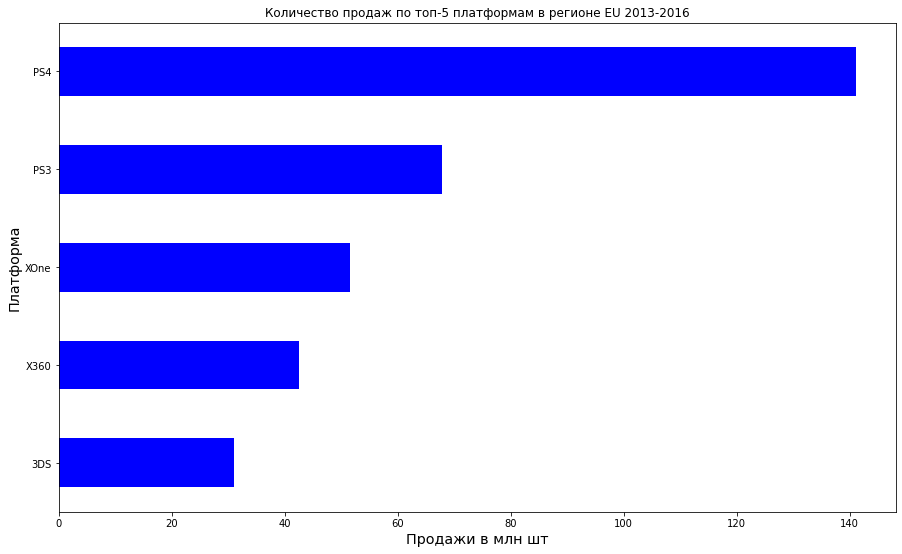

In [47]:
data_eu.plot(kind='barh', y='eu_sales', figsize=(15, 9), legend=False, color = 'Blue')
plt.gca().invert_yaxis()
plt.ylabel('Платформа', size='x-large')
plt.xlabel('Продажи в млн шт', size='x-large')
plt.title('Количество продаж по топ-5 платформам в регионе EU 2013-2016')
plt.show()

В регионе EU лидирующие позиции были у игр на консолях Sony (PS3, PS4), игры на Xbox One существенно уступают по продажам даже PS3 предыдущего поколения, игры на Xbox360 продавались хорошо, но жизненный цикл этой консоли исчерпан. Портативная 3DS также занимает почетное 5 место.

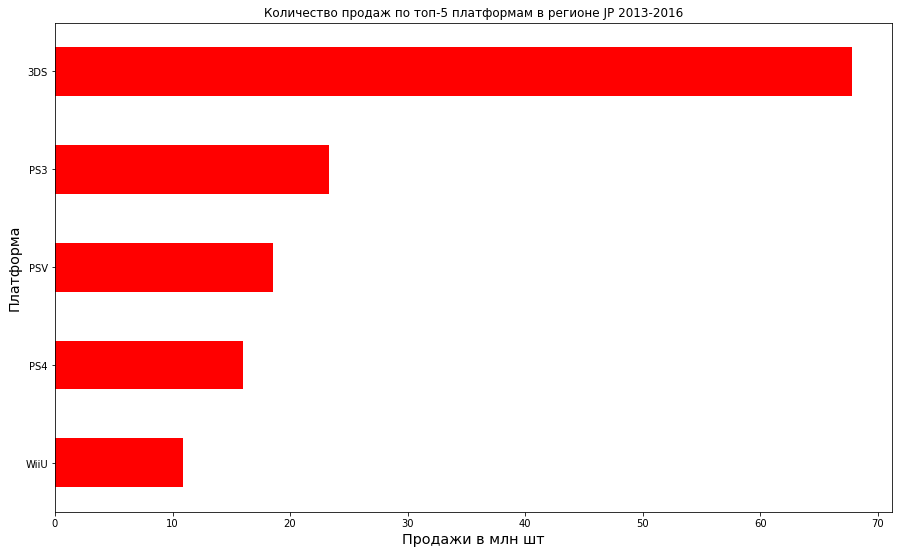

In [48]:
data_jp.plot(kind='barh', y='jp_sales', figsize=(15, 9), legend=False, color = 'Red')
plt.gca().invert_yaxis()
plt.ylabel('Платформа', size='x-large')
plt.xlabel('Продажи в млн шт', size='x-large')
plt.title('Количество продаж по топ-5 платформам в регионе JP 2013-2016')
plt.show()

Японский рынок сильно отличается от EU и NA, здесь наиболее популярны игры на портативные консоли - Nintendo3DS (1 место) и PS Vita (3-е место). Продажи на стационарные PS3 и PS4 тоже хорошие (2 и 4 место). Microsoft - аутсайдеры японского рынка.

**Вывод**:
- На рынке EU и NA доминируют игры на стационарные консоли, на рынке JP - игры на портативные
- Sony имеет наиболее сильные позиции на всех трех рынках по совокупности, игры на консоли Microsoft популярны только в Северной Америке, Nintendo только в Японии.

#### Самые популярные жанры (топ-5) по регионам NA, EU и JP.

In [49]:
# Сгруппируем данные топ-5 жанрам по регионам NA, EU и JP
data_na_g = data.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
data_eu_g = data.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
data_jp_g = data.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
display(data_na_g)
display(data_eu_g)
display(data_jp_g)

,na_sales
genre,
Action,230.92
Shooter,194.43
Sports,108.70
Role-Playing,83.78
Misc,69.69


,eu_sales
genre,
Action,199.12
Shooter,148.02
Sports,88.47
Role-Playing,62.30
Racing,40.58


,jp_sales
genre,
Role-Playing,79.87
Action,63.62
Misc,17.60
Fighting,12.38
Platform,12.13


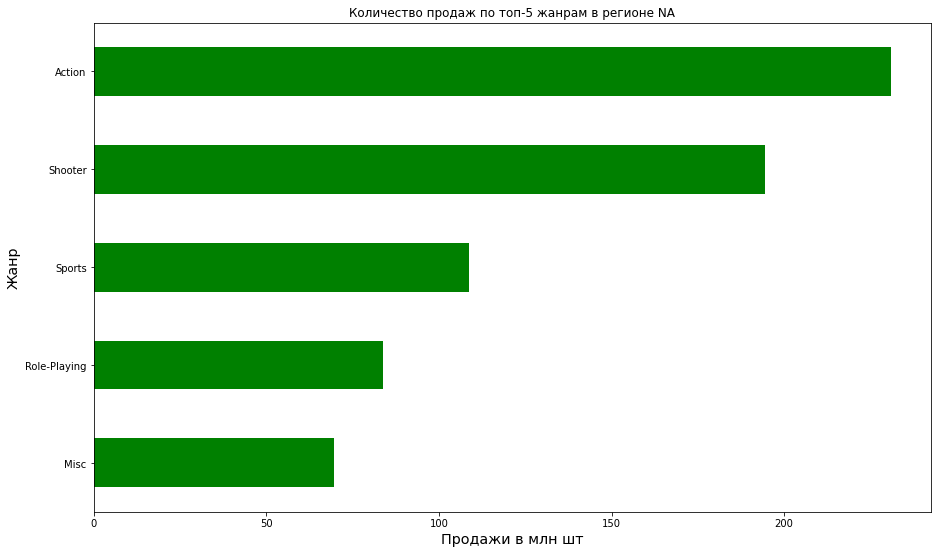

In [50]:
# Построим графики по топ-5 жанрам по регионам NA, EU и JP
data_na_g.plot(kind='barh', y='na_sales', figsize=(15, 9), legend=False, color = 'Green')
plt.gca().invert_yaxis()
plt.ylabel('Жанр', size='x-large')
plt.xlabel('Продажи в млн шт', size='x-large')
plt.title('Количество продаж по топ-5 жанрам в регионе NA')
plt.show()

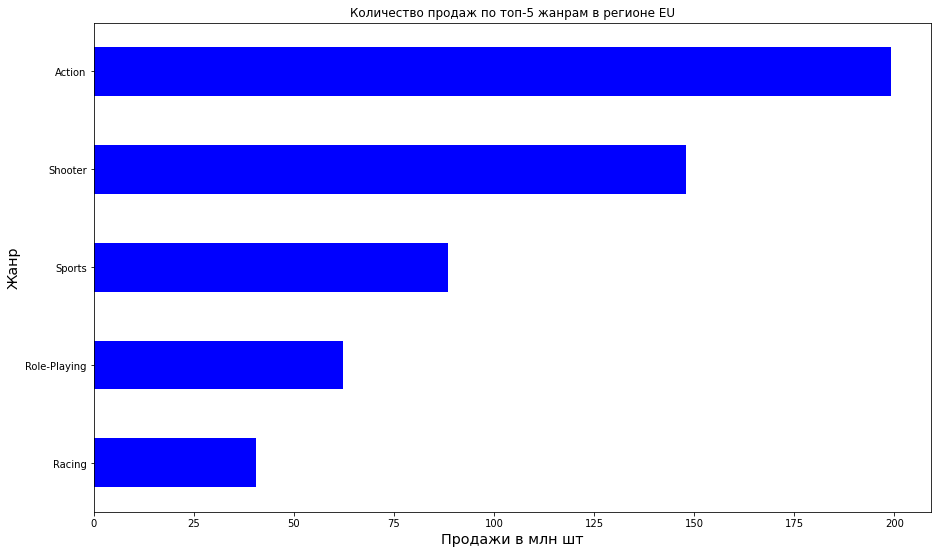

In [51]:
data_eu_g.plot(kind='barh', y='eu_sales', figsize=(15, 9), legend=False, color = 'Blue')
plt.gca().invert_yaxis()
plt.ylabel('Жанр', size='x-large')
plt.xlabel('Продажи в млн шт', size='x-large')
plt.title('Количество продаж по топ-5 жанрам в регионе EU')
plt.show()

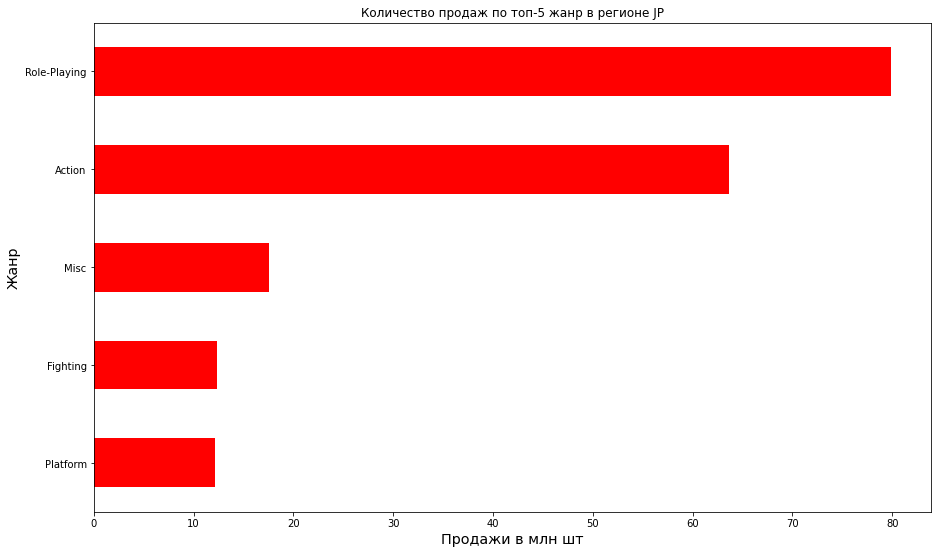

In [52]:
data_jp_g.plot(kind='barh', y='jp_sales', figsize=(15, 9), legend=False, color = 'Red')
plt.gca().invert_yaxis()
plt.ylabel('Жанр', size='x-large')
plt.xlabel('Продажи в млн шт', size='x-large')
plt.title('Количество продаж по топ-5 жанр в регионе JP')
plt.show()

**Вывод**:
- Предпочтения игроков в регионах NA и EU почти полностью совпадают - топ-4 жанра: Экшн, шутер, спортивный симулятор, РПГ.
- Предпочтения японских игроков разительно отличаются - РПГ занимает первое место, Экшн второе, заметная доля рынка приходится на файтинги и платформеры (4 и 5) место соответственно).

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Согласен, NA и EU во многом схожи, в то время, как Япония более самобытна.
</div>

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [53]:
# Сгруппируем данные по пользовательскому рейтингу по регионам
data_na_r = data.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
data_eu_r = data.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
data_jp_r = data.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
display(data_na_r)
display(data_eu_r)
display(data_jp_r)

,na_sales
rating,
M,308.45
E,170.17
no info,123.69
E10+,117.72
T,109.31
EC,0.42
RP,0.00


,eu_sales
rating,
M,250.26
E,141.72
no info,116.61
T,83.16
E10+,78.00
RP,0.03
EC,0.00


,jp_sales
rating,
no info,138.21
E,36.68
T,33.39
M,26.14
E10+,11.23
EC,0.00
RP,0.00


In [54]:
# Уберем нулевые и околонулевые значения для дальней визуализации
data_na_r = data_na_r.loc[~(data_na_r['na_sales'] < 0.5)]
data_eu_r = data_eu_r.loc[~(data_eu_r['eu_sales'] < 0.5)]
data_jp_r = data_jp_r.loc[~(data_jp_r['jp_sales'] < 0.5)]

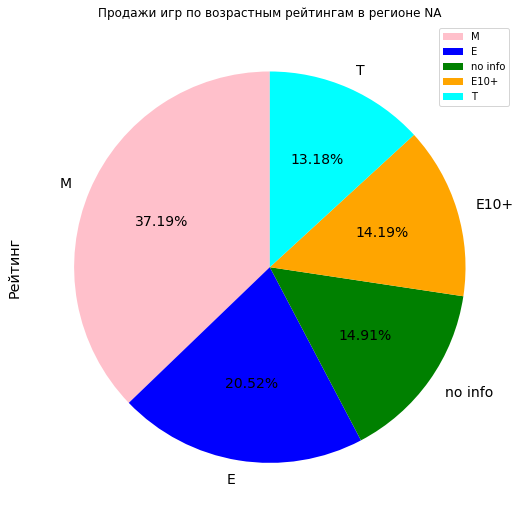

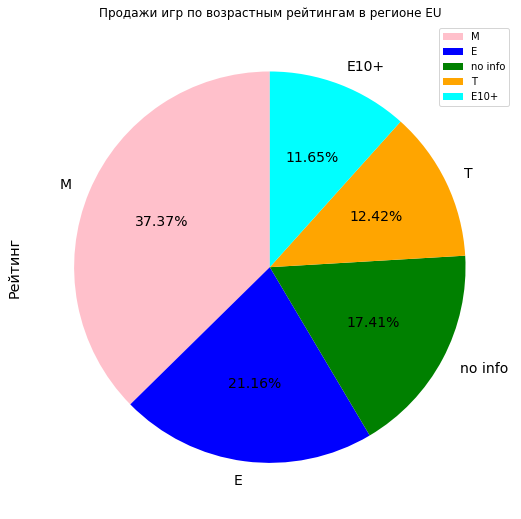

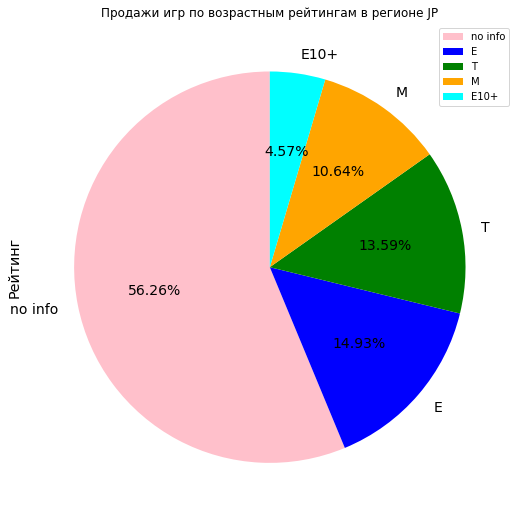

In [55]:
# Построим круговые диаграммы для ясной визуализации полученных данных
data_na_r.plot.pie(y='na_sales', grid=True,  figsize=(9, 9), title='Продажи игр по возрастным рейтингам в регионе NA', 
                    autopct = "%.2f%%", colors=['Pink', 'Blue', 'Green', 'Orange', 'Cyan',], startangle=90, fontsize=14);
plt.ylabel('Рейтинг', size='x-large')
plt.show();
data_eu_r.plot.pie(y='eu_sales', grid=True,  figsize=(9, 9), title='Продажи игр по возрастным рейтингам в регионе EU', 
                    autopct = "%.2f%%", colors=['Pink', 'Blue', 'Green', 'Orange', 'Cyan',], startangle=90, fontsize=14);
plt.ylabel('Рейтинг', size='x-large')
plt.show();
data_jp_r.plot.pie(y='jp_sales', grid=True,  figsize=(9, 9), title='Продажи игр по возрастным рейтингам в регионе JP', 
                    autopct = "%.2f%%", colors=['Pink', 'Blue', 'Green', 'Orange', 'Cyan',], startangle=90, fontsize=14);
plt.ylabel('Рейтинг', size='x-large')
plt.show();

Из вышеописанных данных можно сделать выводы:
- Наиболее популярными играми в регионах NA и EU являются игры с рейтингом М(от 17 лет), на них приходится ~37% от общих продаж, на втором месте игры для всех возрастов с рейтингами E и E+10, на них приходится ~32% от общих продаж.
- По региону JP у нас нет данных по 56% продажам по рейтингу игр, делать какие-то выводы одназначно сложно, на втором месте также игры с рейтингами E и E+10, на них приходится ~20% продаж.

**Поводя итоги опишем портрет пользователя для каждого региона**:

Геймер в регионе NA предпочитает:
* Игры на стационарные консоли PS4 и Хbox One, у игр на PS4 большая доля продаж на момент 2013-2016.
* Игры в жанре Action, шутер, спортивные симуляторы и РПГ.
* Игры с рейтингом для взрослых (М, от 17 лет) и для всех вовзрастов (E и E+10).

Геймер в регионе EU предпочитает:
* Игры на стационарные консоли, на момент 2013-2016 года, доминирующее положение на европейском рынке занимали игры на PS4.
* Игры в жанре Action, шутер, спортивные симуляторы и РПГ (в этом геймеры EU полностью совпадают по предпочтениям с NA).
* Игры с рейтингом для взрослых (М, от 17 лет) и для всех вовзрастов (E и E+10), также почти полное совпадение с игроками NA.

Геймер в регионе JP предпочитает:
* Игры на портативные консоли.
* Наиболее популярные игры в жанре РПГ, Экшн и файтинг.
* По возрастному рейтингу одназначную картину получить не получилось из-за отсутствия данных.

### Гипотезы по средним пользовательским рейтингам.

#### Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [56]:
# Отсортируем данные методом query из нашего датафрейма data
data_hp_pc = data.query("platform == 'PC' & user_score > -1")
data_hp_x_one = data.query("platform == 'XOne' & user_score > -1")
data_hp_pc = data_hp_pc.reset_index(drop=True)
data_hp_x_one = data_hp_x_one.reset_index(drop=True)
display(data_hp_pc.head(5))
display(data_hp_x_one.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
1,The Elder Scrolls V: Skyrim,PC,2011,Role-Playing,1.16,2.12,0.0,0.60,94.0,8.1,M,3.88
2,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
3,Star Wars: The Old Republic,PC,2011,Role-Playing,1.58,1.01,0.0,0.38,85.0,5.9,T,2.97
4,Battlefield 3,PC,2011,Shooter,0.89,1.43,0.0,0.46,89.0,7.5,M,2.78


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
2,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
3,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
4,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


Необходимо проверить, являются пользовательские рейтинги (user_score) для платформ PC и Xbox одинаковыми. Выдвенем нулевую и альтернативную гипотезы, т.к. нас интересуют отличия как в большую, так и в меньшую сторону, то будем проверять двустронню гипотезу методом **ttest_ind()**.

H_0 : Cредние пользовательские рейтинги платформ Xbox One и PC равны.

H_1: Cредние пользовательские рейтинги платформ Xbox One и PC не равны.

Уровень статистической значимости установим в 1%.

In [57]:
var_1 = data_hp_pc['user_score']
var_2 = data_hp_x_one['user_score']
alpha = 0.01
results = st.ttest_ind(var_1, var_2,) # по умолчанию проверяется двусторонняя гипотеза, 
# т.к. нас интересует разъедутся ли данные в большую или меньшую стороны
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 0.6267602271422398
Не удалось отвергнуть нулевую гипотезу


**Вывод**: При установленном уровне значимости в 1% нулевую гипотезу отвергнуть не удалось. Значит, мы можем сказать, что пользовательские рейтинги платформ PC и Xbox One равны.

#### Гипотеза: средние пользовательские рейтинги жанров Action  и Sports разные.

In [58]:
# Отсортируем данные методом query из нашего датафрейма data
data_hp_action = data.query("genre == 'Action' & user_score > -1")
data_hp_sportsim = data.query("genre == 'Sports' & user_score > -1")
data_hp_action = data_hp_action.reset_index(drop=True)
data_hp_sportsim = data_hp_sportsim.reset_index(drop=True)
display(data_hp_action.head(5))
display(data_hp_sportsim.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
4,Uncharted 3: Drake's Deception,PS3,2011,Action,2.77,2.75,0.19,1.03,92.0,8.3,T,6.74


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
1,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
2,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
3,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
4,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,-1.0,4.5,E,4.28


Необходимо проверить, являются пользовательские рейтинги (user_score) для жанров Action и Sports разными. Выдвенем нулевую и альтернативную гипотезы. Нас интересуют отличия как в большую, так и в меньшую сторону, так что также используем метод **ttest_ind()**.

H_0 : Cредние пользовательские рейтинги жанров Action и Sports равны.

H_1 : Cредние пользовательские рейтинги жанров Action и Sports не равны.

In [59]:
var_action = data_hp_action['user_score']
var_sportsim = data_hp_sportsim['user_score']
alpha = 0.01
results = st.ttest_ind(var_action, var_sportsim,) # по умолчанию проверяется двусторонняя гипотеза, 
# т.к. нас интересует разъедутся ли данные в большую или меньшую стороны
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 6.700647490667088e-24
Отвергаем нулевую гипотезу


**Вывод**: При установленном уровне значимости в 1% нулевая гипотеза было отвергнута. Значит, мы можем сказать, что пользовательские рейтинги жанров Action и Sports **не** равны.

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
* Правильно, что для тестирования гипотез использован двусторонний t-тест Стьюдента.

* Хорошо, что использован параметр отфильтровывющий пропуски. 
</div>

<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Также можно вывести не только pvalue, но еще и средние значения выборок, которые мы изучаем. Это позволит нам проверить не ошиблись ли мы, если они расходятся с тестом Стьюдента.
</div>

## Общий вывод.

Основная цель нашего исследования - сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год для нашего интернет-магазина. Из исследования мы узнали, что:
* Платформа-лидер рынка по состоянию на 2016 год - PS4. Соответственно, наибольшую популярность будут иметь игры именно на этой платформе. И потенциальная выручка от продажи игр именно на PS4 будет выше.
* Отзывы пользователей почти не влияют на продажи, а отзывы критиков влияют, но в небольшой степени. Стоит обращать внимание на то, как принята игра критиками перед релизом.
* Наиболее популярные жанры по продажам это шутеры и экшены. У игр в жанре 'шутер' наибольшие показатели продаж среди всех жанров, в то время как 'экшен' в целом является самым популярным видеоигровым жанром и наиболее представленным на рынке.
* На рынке EU и NA у пользователей почти одинаковые предпочтения по возрастной категории и жанрам видеоигр.
* На рынках EU и NA пользователи предпочитают играть на стационарных консолях.
* У игр на Xbox One сильные позиции в Северной Америке, но очень слабые на двух других рынках. Стоит это учитывать при планировании рекламных кампаний в регионе NA.
* Японский рынок видеоигр сильно отличается от NA и EU, как по жанровым предпочтениям, так и по платформам.